In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from pprint import pprint
import folium
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import PowerTransformer

In [2]:
class airbnb_city:
    
    def __init__(self, csv):
        
        self.csv = csv
                
        self.df_city = pd.read_csv(self.csv)
        
        print("Instance created!")
        
    def clean_columns(self):
        
        # Take only the relevant columns in the dataframe
        
        l_relevant_columns = ["host_is_superhost","neighbourhood_cleansed","neighbourhood_group_cleansed","property_type","room_type","accommodates","bathrooms_text","beds","price","minimum_nights","maximum_nights","availability_30","availability_365","number_of_reviews","instant_bookable", "amenities", "host_verifications"]

        self.df_city = self.df_city[l_relevant_columns]
        
        self.df_city["bathrooms_text"].replace(np.nan, "?", inplace = True)
        
        # Get numbers out of bathroom_text columns
        
        l_nums = [re.findall(r'\d+',i) for i in self.df_city["bathrooms_text"].values]

        l_nums_completed = []

        for i in l_nums:

            if len(i) > 1:

                l_nums_completed.append('.'.join(i))

            elif len(i) == 0:

                l_nums_completed.append('0')

            else:

                l_nums_completed.append(i[0])

        # Separate categories from bathroom_text
        
        l_category = []

        for i in self.df_city["bathrooms_text"].values:

            if "shared" in i:

                l_category.append("Shared")

            elif "private" in i:

                l_category.append("Private")

            else:

                l_category.append("Unknown")
                
        # Create two different columns replacing bathroom_text
        
        self.df_city.drop("bathrooms_text", axis = 1, inplace = True)
                
        self.df_city["num_of_baths"] = l_nums_completed
        
        self.df_city["bath_category"] = l_category
        
        self.df_city["num_of_baths"] = self.df_city["num_of_baths"].astype("float64")

        # Column["prices"]
        
        self.df_city["price"]  = self.df_city["price"] .apply(lambda x: float(x.strip("$").replace(',', '')) if pd.notnull(x) else x)
        
        self.df_city["amenities"] = [len(i) for i in self.df_city["amenities"]]

        self.df_city["host_verifications"] = [len(i) for i in self.df_city["host_verifications"]]
        
        
        print("Dataframe sucessfully created!")
    
    def label_encoding(self):
        
        self.df_city.dropna(inplace=True)
        
        # Encoding columns with dummies function
        
        def dummies(data, column):
            return pd.get_dummies(data = data[column], drop_first=True)
        
        self.df_city["host_is_superhost"] = dummies(self.df_city, "host_is_superhost")
        self.df_city["instant_bookable"] = dummies(self.df_city, "instant_bookable")
        
        df_room_type = dummies(self.df_city, "room_type")
        df_bath_category = dummies(self.df_city, "bath_category")
        df_bath_category = df_bath_category.rename(columns={'Shared': 'shared_bath', 'Unknown': 'unknoun_bath'})
        
        self.df_city = pd.concat([self.df_city, df_bath_category], axis = 1)

        self.df_city = pd.concat([self.df_city, df_room_type], axis = 1)

        self.df_city.drop("room_type", axis = 1, inplace = True)

        self.df_city.drop("bath_category", axis = 1, inplace = True)
        
        # Encoding categorical columns with labelEncoding function
        
        l_columns_to_labelEncode = ["neighbourhood_cleansed", "property_type", "neighbourhood_group_cleansed"]
        l_columns_encoded = list()

        for i in l_columns_to_labelEncode:

            # Inicializing object LabelEncoder()
            o_labelEncoding = LabelEncoder()

            # Training it with the column data
            o_labelEncoding.fit(self.df_city[i].values)

            # Transform the column
            l_columns_encoded.append(o_labelEncoding.transform(self.df_city[i].values))

        self.df_city["neighbourhood_cleansed"] = l_columns_encoded[0]
        self.df_city["property_type"] = l_columns_encoded[1]
        self.df_city["neighbourhood_group_cleansed"] = l_columns_encoded[2]
        
        print("Dataframe sucessfully encoded!")

        
    def return_df(self):
    
        return self.df_city
    
    def display_df(self):
    
        display(self.df_city)

In [ ]:
madrid = airbnb_city("C:\\Users\\ignci\\OneDrive\\Escritorio\\Curso\\Coisigna\\dsb-p2-ml\\ipynbs\datasets\\Madrid air bnb\\listings_detailed.csv")

In [3]:
madrid = airbnb_city("datasets/Madrid air bnb/listings_detailed.csv")

Instance created!


In [4]:
df = madrid.return_df()

In [5]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

# R**2 = 0.43

In [ ]:
df_columns_chosen = df[["host_id", "neighbourhood_group_cleansed", "latitude", "longitude", "room_type","accommodates", "price","minimum_nights","availability_365","number_of_reviews","calculated_host_listings_count", "reviews_per_month"]]

# R**2 = 0.25

In [ ]:
df_columns_chosen = df[["neighbourhood_group_cleansed","accommodates", "price","minimum_nights","availability_365","number_of_reviews","calculated_host_listings_count", "reviews_per_month"]]

# Markdown reserved

In [6]:
df_columns_chosen = df[["neighbourhood_group_cleansed","property_type","latitude","longitude","accommodates", "price","minimum_nights","availability_365","number_of_reviews","calculated_host_listings_count", "reviews_per_month"]]

# Markdown reserved

# Markdown reserved

# Markdown reserved

In [7]:
df_columns_chosen

,neighbourhood_group_cleansed,property_type,latitude,longitude,accommodates,price,minimum_nights,availability_365,number_of_reviews,calculated_host_listings_count,reviews_per_month
0,Chamartín,Private room in apartment,40.45724,-3.67688,2,$60.00,1,180,78,1,0.58
1,Latina,Private room in apartment,40.40381,-3.74130,1,$31.00,4,364,33,2,0.42
2,Arganzuela,Entire apartment,40.38840,-3.69511,6,$50.00,15,1,0,7,NaN
3,Centro,Entire apartment,40.42183,-3.70529,3,$92.00,5,72,10,1,0.13
4,Arganzuela,Private room in house,40.38975,-3.69018,1,$26.00,2,365,149,1,1.12
...,...,...,...,...,...,...,...,...,...,...,...
19613,Centro,Private room in apartment,40.40756,-3.69937,1,$23.00,30,349,0,8,NaN
19614,Chamberí,Private room in apartment,40.43706,-3.71364,1,$21.00,30,350,0,8,NaN
19615,Chamberí,Private room in apartment,40.43857,-3.70715,1,$22.00,7,364,0,8,NaN
19616,Salamanca,Private room in apartment,40.43027,-3.66759,1,$19.00,30,349,0,8,NaN


In [8]:
df_columns_chosen = df_columns_chosen.dropna()

In [27]:
df_columns_chosen.reset_index(drop = True, inplace = True)

In [10]:
df_columns_chosen["price"]

0        $60.00
1        $31.00
3        $92.00
4        $26.00
5        $85.00
          ...  
19494    $44.00
19499    $37.00
19500    $70.00
19501    $47.00
19532    $70.00
Name: price, Length: 13981, dtype: object

In [11]:
df_columns_chosen["price"] = df_columns_chosen["price"].apply(lambda x: float(x.strip("$").replace(',', '')) if pd.notnull(x) else x).values

/var/folders/10/5nbnv2696vlgb605wf3g6wwh0000gn/T/ipykernel_6311/1023210409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_columns_chosen["price"] = df_columns_chosen["price"].apply(lambda x: float(x.strip("$").replace(',', '')) if pd.notnull(x) else x).values


In [21]:
from collections import Counter

Counter(df_columns_chosen["property_type"])

Counter({'Private room in apartment': 3859,
         'Entire apartment': 7523,
         'Private room in house': 477,
         'Entire loft': 498,
         'Entire condominium': 248,
         'Private room in guest suite': 33,
         'Private room in chalet': 30,
         'Entire serviced apartment': 148,
         'Entire house': 146,
         'Private room in condominium': 219,
         'Private room in bed and breakfast': 59,
         'Private room in townhouse': 38,
         'Entire guest suite': 20,
         'Shared room in apartment': 108,
         'Room in aparthotel': 6,
         'Entire bungalow': 1,
         'Private room in loft': 34,
         'Shared room in bed and breakfast': 36,
         'Dome house': 2,
         'Shared room in loft': 6,
         'Shared room in hostel': 25,
         'Private room': 7,
         'Private room in floor': 10,
         'Entire place': 4,
         'Private room in casa particular': 11,
         'Room in serviced apartment': 17,
         'Sh

In [22]:
dict_property_types = dict(Counter(df_columns_chosen["property_type"]))

In [23]:
dict_property_types[list(dict_property_types.keys())[0]]

3859

In [24]:
list_others = []
for i in dict_property_types.keys():
    
    if dict_property_types[i] < 300:
        
        list_others.append(i)
        
for i in list_others:
    
    df_columns_chosen["property_type"].replace(i,"Other", inplace = True)

/var/folders/10/5nbnv2696vlgb605wf3g6wwh0000gn/T/ipykernel_6311/1177635394.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_columns_chosen["property_type"].replace(i,"Other", inplace = True)


In [25]:
Counter(df_columns_chosen["property_type"])

Counter({'Private room in apartment': 3859,
         'Entire apartment': 7523,
         'Private room in house': 477,
         'Entire loft': 498,
         'Other': 1624})

In [28]:
df_columns_chosen

,neighbourhood_group_cleansed,property_type,latitude,longitude,accommodates,price,minimum_nights,availability_365,number_of_reviews,calculated_host_listings_count,reviews_per_month
0,Chamartín,Private room in apartment,40.45724,-3.67688,2,60.0,1,180,78,1,0.58
1,Latina,Private room in apartment,40.40381,-3.74130,1,31.0,4,364,33,2,0.42
2,Centro,Entire apartment,40.42183,-3.70529,3,92.0,5,72,10,1,0.13
3,Arganzuela,Private room in house,40.38975,-3.69018,1,26.0,2,365,149,1,1.12
4,Arganzuela,Entire apartment,40.38860,-3.69492,6,85.0,1,365,3,7,0.03
...,...,...,...,...,...,...,...,...,...,...,...
13976,Centro,Entire apartment,40.42207,-3.69930,4,44.0,2,331,1,2,1.00
13977,Centro,Entire apartment,40.42059,-3.70338,2,37.0,2,0,1,1,1.00
13978,Ciudad Lineal,Entire apartment,40.43080,-3.65934,3,70.0,1,89,1,1,1.00
13979,Centro,Entire apartment,40.42035,-3.70963,2,47.0,1,358,2,5,2.00


In [30]:
# Inicializing object LabelEncoder()
o_labelEncoding = LabelEncoder()

# Training it with the column data
o_labelEncoding.fit(df_columns_chosen["property_type"].values)

# Transform the column
df_columns_chosen["property_type"] = o_labelEncoding.transform(df_columns_chosen["property_type"].values)

/var/folders/10/5nbnv2696vlgb605wf3g6wwh0000gn/T/ipykernel_6311/552826231.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_columns_chosen["property_type"] = o_labelEncoding.transform(df_columns_chosen["property_type"].values)


In [31]:
df_columns_chosen

,neighbourhood_group_cleansed,property_type,latitude,longitude,accommodates,price,minimum_nights,availability_365,number_of_reviews,calculated_host_listings_count,reviews_per_month
0,Chamartín,3,40.45724,-3.67688,2,60.0,1,180,78,1,0.58
1,Latina,3,40.40381,-3.74130,1,31.0,4,364,33,2,0.42
2,Centro,0,40.42183,-3.70529,3,92.0,5,72,10,1,0.13
3,Arganzuela,4,40.38975,-3.69018,1,26.0,2,365,149,1,1.12
4,Arganzuela,0,40.38860,-3.69492,6,85.0,1,365,3,7,0.03
...,...,...,...,...,...,...,...,...,...,...,...
13976,Centro,0,40.42207,-3.69930,4,44.0,2,331,1,2,1.00
13977,Centro,0,40.42059,-3.70338,2,37.0,2,0,1,1,1.00
13978,Ciudad Lineal,0,40.43080,-3.65934,3,70.0,1,89,1,1,1.00
13979,Centro,0,40.42035,-3.70963,2,47.0,1,358,2,5,2.00


In [ ]:
# def dummies(data, column):
#     return pd.get_dummies(data = data[column], drop_first=True)

In [ ]:
# df_room_type = dummies(df_columns_chosen, "room_type")

In [ ]:
# df_columns_chosen = pd.concat([df_columns_chosen, df_room_type], axis = 1)

In [ ]:
# df_columns_chosen.drop("room_type", axis = 1, inplace = True)

In [32]:
# Inicializing object LabelEncoder()
o_labelEncoding = LabelEncoder()

# Training it with the column data
o_labelEncoding.fit(df_columns_chosen["neighbourhood_group_cleansed"].values)

# Transform the column
df_columns_chosen["neighbourhood_group_cleansed"] = o_labelEncoding.transform(df_columns_chosen["neighbourhood_group_cleansed"].values)


/var/folders/10/5nbnv2696vlgb605wf3g6wwh0000gn/T/ipykernel_6311/3873492371.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_columns_chosen["neighbourhood_group_cleansed"] = o_labelEncoding.transform(df_columns_chosen["neighbourhood_group_cleansed"].values)


In [33]:
df_columns_chosen

,neighbourhood_group_cleansed,property_type,latitude,longitude,accommodates,price,minimum_nights,availability_365,number_of_reviews,calculated_host_listings_count,reviews_per_month
0,4,3,40.45724,-3.67688,2,60.0,1,180,78,1,0.58
1,9,3,40.40381,-3.74130,1,31.0,4,364,33,2,0.42
2,3,0,40.42183,-3.70529,3,92.0,5,72,10,1,0.13
3,0,4,40.38975,-3.69018,1,26.0,2,365,149,1,1.12
4,0,0,40.38860,-3.69492,6,85.0,1,365,3,7,0.03
...,...,...,...,...,...,...,...,...,...,...,...
13976,3,0,40.42207,-3.69930,4,44.0,2,331,1,2,1.00
13977,3,0,40.42059,-3.70338,2,37.0,2,0,1,1,1.00
13978,6,0,40.43080,-3.65934,3,70.0,1,89,1,1,1.00
13979,3,0,40.42035,-3.70963,2,47.0,1,358,2,5,2.00


# Getting rid of outliers using quantiles

In [ ]:
cols = ["price", "minimum_nights", "calculated_host_listings_count",
        "reviews_per_month", "number_of_reviews"]

for col in cols:
    upper_bound = df_columns_chosen[col].quantile(0.95)
    lower_bound = df_columns_chosen[col].quantile(0.05)
    listings = df_columns_chosen[df_columns_chosen[col] < upper_bound]
    listings = df_columns_chosen[df_columns_chosen[col] > lower_bound]

In [34]:
cols = df_columns_chosen.columns

for col in cols:
    upper_bound = df_columns_chosen[col].quantile(0.95)
    lower_bound = df_columns_chosen[col].quantile(0.05)
    listings = df_columns_chosen[df_columns_chosen[col] < upper_bound]
    listings = df_columns_chosen[df_columns_chosen[col] > lower_bound]

/var/folders/10/5nbnv2696vlgb605wf3g6wwh0000gn/T/ipykernel_6311/3946210335.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_columns_chosen[numeric_cols] = pt.fit_transform(df_columns_chosen[numeric_cols])


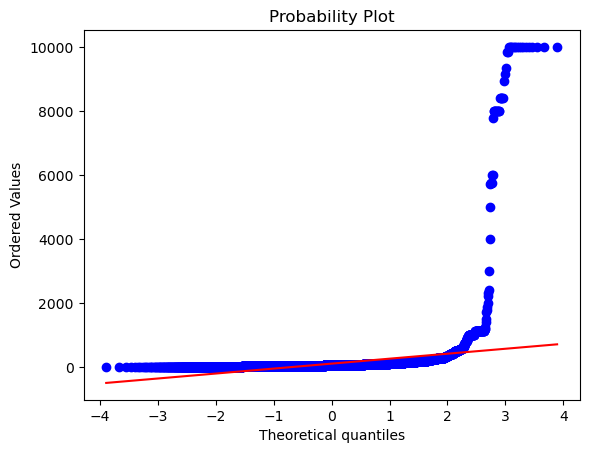

In [35]:
# Plot before transformation
stats.probplot(df_columns_chosen["price"], plot=plt)

# Power Transformer
numeric_cols = list(df_columns_chosen._get_numeric_data().columns)
pt = PowerTransformer(method="yeo-johnson")
df_columns_chosen[numeric_cols] = pt.fit_transform(df_columns_chosen[numeric_cols])

((array([-3.89265493, -3.67198108, -3.55103111, ...,  3.55103111,
          3.67198108,  3.89265493]),
  array([-3.33195413, -3.33195413, -3.08121355, ...,  3.56533681,
          3.56533681,  3.56533681])),
 (0.9975712775264198, -3.2462898705224585e-16, 0.9973076543913557))

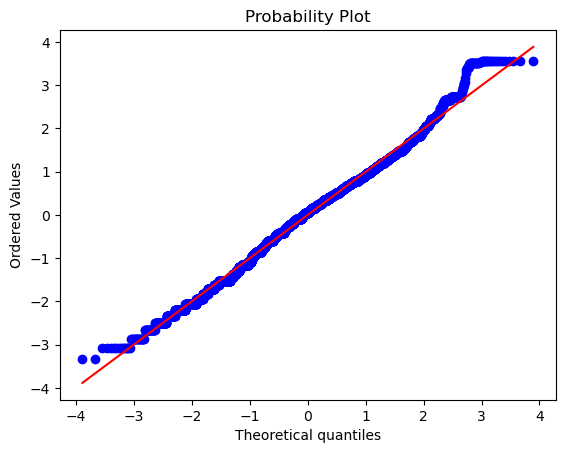

In [36]:
# After transformation
stats.probplot(df_columns_chosen["price"], plot=plt)

In [37]:
df_columns_chosen

,neighbourhood_group_cleansed,property_type,latitude,longitude,accommodates,price,minimum_nights,availability_365,number_of_reviews,calculated_host_listings_count,reviews_per_month
0,-0.164326,1.191556,3.608225e-16,0.777949,-0.544369,0.156251,-1.114435,0.544565,1.063428,-0.979897,-0.101958
1,0.833615,1.191556,-1.665335e-16,-2.100801,-1.648758,-0.796569,1.007303,1.112689,0.553450,-0.174317,-0.376323
2,-0.475055,-0.911948,0.000000e+00,-0.329159,0.160786,0.683340,1.225198,-0.037562,-0.193677,-0.979897,-1.062389
3,-2.296705,1.403353,-3.053113e-16,0.287889,-1.648758,-1.080978,0.094146,1.115141,1.425795,-0.979897,0.527799
4,-2.296705,-0.911948,-3.053113e-16,0.101519,1.368129,0.590690,-1.114435,1.115141,-0.932204,0.976580,-1.384548
...,...,...,...,...,...,...,...,...,...,...,...
13976,-0.475055,-0.911948,0.000000e+00,-0.076463,0.666904,-0.269280,0.094146,1.028966,-1.479153,-0.174317,0.416157
13977,-0.475055,-0.911948,0.000000e+00,-0.247395,-0.544369,-0.523790,0.094146,-1.406846,-1.479153,-0.979897,0.416157
13978,0.313833,-0.911948,8.326673e-17,1.356004,0.160786,0.353998,-1.114435,0.083294,-1.479153,-0.979897,0.416157
13979,-0.475055,-0.911948,0.000000e+00,-0.519187,-0.544369,-0.175607,-1.114435,1.097877,-1.155009,0.725585,1.081942


# Outliers

In [ ]:
for i in df_columns_chosen.columns:
    
    print(i)
    sns.kdeplot(df_columns_chosen[i])
    plt.show()

In [ ]:
df.shape

In [ ]:
df = df[df["beds"]<15]

In [ ]:
df.shape

In [ ]:
df = df[df["accommodates"]<13]

In [ ]:
df.shape

In [ ]:
df = df[df["price"]<700]

In [ ]:
sns.histplot(df[df["host_is_superhost"] == 0]["price"])

In [ ]:
sns.histplot(df[df["host_is_superhost"] == 1]["price"])

In [ ]:
df.shape

In [ ]:
df = df[df["minimum_nights"]<150]

In [ ]:
df.shape

In [ ]:
df = df[df["maximum_nights"]<1500]

In [ ]:
df.shape

In [ ]:
df = df[df["number_of_reviews"]<500]

In [ ]:
df.shape

In [ ]:
df = df[df["amenities"]<1200]

In [ ]:
df.shape

In [ ]:
df = df[df["host_verifications"]<160]

In [ ]:
df.shape

In [ ]:
df = df[df["num_of_baths"] < 7]

In [ ]:
df.shape

In [ ]:
for i in df.columns:
    
    print(i)
    sns.kdeplot(df[i])
    plt.show()

## Dividing x & y

In [ ]:
X = df_columns_chosen.drop("price", axis = 1)
y = df_columns_chosen[["price"]]


## Scaling data

In [ ]:
from sklearn.preprocessing import MinMaxScaler


scaler_x = MinMaxScaler()
scaler_x.fit(X)
X = scaler_x.transform(X)


scaler_y = MinMaxScaler()
scaler_y.fit(y)
y = scaler_y.transform(y)

# Feature importances

In [ ]:
df_class = df_columns_chosen["price"].copy()

In [ ]:
df_columns_chosen.drop("price", axis = 1, inplace = True)

In [ ]:
X = np.asarray(df_columns_chosen)
y = np.asarray(df_class)

In [ ]:
X.shape, y.shape

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

# Build a forest and compute the feature importances
forest = ExtraTreesRegressor(n_estimators = 250,
                              random_state = 0)

forest.fit(X, y)

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis = 0)

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f): %s" % (f + 1, indices[f], importances[indices[f]], df_columns_chosen.columns[f]))

# Plot the feature importances of the forest
plt.figure()

plt.title("Feature importances")

plt.bar(range(X.shape[1]), importances[indices], color = "r", yerr = std[indices], align = "center")

plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# 1. LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

print(f"Train data: {X_train.shape, y_train.shape}")
print(f"Test data: {X_test.shape, y_test.shape}")

In [ ]:
# Regresión algorithm

regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train)

# Finding coef

print ("weights:", regresion_lineal.coef_)
print ("w_0:", regresion_lineal.intercept_)

## Predicción

In [ ]:
yhat = regresion_lineal.predict(X_test)

for i, j in zip(yhat[:5], y_test[:5]):
    print(f"Predicción:{i} \tValor real:{j}")

## Metrics

In [ ]:
# Sklearn tiene las formulas de algunas métricas en funciones.

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# Relative Absolute Error
RAE = np.sum(np.abs(np.subtract(y_test, yhat))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))

# Relative Square Error
RSE = np.sum(np.square(np.subtract(y_test, yhat))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))

# Adjusted R**2
r2_ajustada = 1 - (1 - regresion_lineal.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

In [ ]:
print(f"MAE:\t {mean_absolute_error(yhat, y_test)}")
print(f"MSE:\t {mean_squared_error(yhat, y_test)}")
print(f"R**2:\t {r2_score(yhat, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

In [ ]:
# Veamos los valores de yhat, y_test y su diferencia

df_pred = pd.DataFrame()

df_pred["y_test"] = scaler_y.inverse_transform([y_test]).flatten()
df_pred["yhat"] = scaler_y.inverse_transform([yhat]).flatten()

df_pred["diferencia"] = round(abs((df_pred["y_test"] - df_pred["yhat"]) / df_pred["y_test"] * 100), 4)

df_pred = df_pred.sort_values("diferencia")

df_pred.head(20)

In [ ]:
df_pred.tail(20)

In [ ]:
# Distance btw real and predicted values

plt.figure(figsize = (8, 5))

sns.scatterplot(x = y_test.flatten(), y = yhat.flatten(), alpha = 0.5, color = "blue")

plt.xlabel("Valores Reales (y_train)", size = 18)
plt.ylabel("Predicciones (yhat)", size = 18)

plt.show()

# 2. KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model = KNeighborsRegressor(n_neighbors = 7)

model.fit(X_train, y_train)

In [ ]:
yhat = model.predict(X_test)

yhat

In [ ]:
print(f"MAE:\t {mean_absolute_error(yhat, y_test)}")
print(f"MSE:\t {mean_squared_error(yhat, y_test)}")
print(f"R**2:\t {r2_score(yhat, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

# 3. DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

In [ ]:
yhat = model.predict(X_test)

yhat

In [ ]:
print(f"MAE:\t {mean_absolute_error(yhat, y_test)}")
print(f"MSE:\t {mean_squared_error(yhat, y_test)}")
print(f"R**2:\t {r2_score(yhat, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

# 4. RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

In [ ]:
yhat = model.predict(X_test)

yhat

In [ ]:
print(f"MAE:\t {mean_absolute_error(yhat, y_test)}")
print(f"MSE:\t {mean_squared_error(yhat, y_test)}")
print(f"R**2:\t {r2_score(yhat, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

# 4. AdaBoostRegressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
model = AdaBoostRegressor(n_estimators = 50)
model.fit(X_train, y_train)


In [ ]:
yhat = model.predict(X_test)

yhat

In [ ]:
print(f"MAE:\t {mean_absolute_error(yhat, y_test)}")
print(f"MSE:\t {mean_squared_error(yhat, y_test)}")
print(f"R**2:\t {r2_score(yhat, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

In [ ]:
model.base_estimator_

In [ ]:
plt.plot(model.estimator_errors_, marker = "o", color = "red", linestyle = "")
plt.show()

In [ ]:
model.feature_importances_

In [ ]:
df.columns

In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Exportar modelos usando pickle con extensión ".sav"
with open("random_forest_clf.sav", "wb") as file:
    pickle.dump(model, file)
    
# Importar modelos usando pickle con extensión ".sav"
with open("random_forest_clf.sav", "rb") as file:
    model = pickle.load(file)
    
# También se puede usar extensión ".pkl"

# Mapa

In [ ]:
# df.columns

In [ ]:
# df['neighbourhood_group_cleansed'].unique()

In [ ]:
# with open("neighbourhoods.geojson", "r") as file:
    
#     geojson = file.read()
    
# pprint(geojson)

In [ ]:
# df_map = df.groupby('neighbourhood_group_cleansed', as_index=False).mean()
# df_map

In [ ]:
# df_map = df_map[df_map["price"]<200]

In [ ]:
# df_map

In [ ]:
# sns.histplot(df_map["price"])

In [ ]:
# world_map = folium.Map(location = [40.18893909782826, -3.938873736090105], zoom_start =12)

# folium.Choropleth(geo_data     = geojson,
#                   data         = df_map,
#                   columns      = ["neighbourhood_group_cleansed", "price"],
#                   key_on       = "feature.properties.neighbourhood_group",
#                   fill_color   = "Blues_r", 
#                   fill_opacity = 0.7, 
#                   line_opacity = 0.2,
#                   legend_name  = "Precio airbnb",
#                   bins         = 253,
#                   highlight    = True).add_to(world_map)

# world_map